In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('./PEDE_PASSOS_DATASET_FIAP.csv', sep=';')


# Visualização inicial para identificar colunas e tipos de dados
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [3]:
# Lista de colunas que devem ser numéricas
numeric_cols = ['IDADE_ALUNO_2020', 'ANOS_PM_2020', 'INDE_2020']

# Conversão para numérico, tratando valores não numéricos como NaN
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Opção: Preencher NaNs com a média ou mediana da coluna
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)


In [4]:
# Remover colunas com mais de 50% de dados ausentes, por exemplo
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)


In [5]:
## Remover a coluna 'FASE_TURMA_2020'
df = df.drop(columns=['FASE_TURMA_2020'])


In [6]:
# Remover o prefixo 'ALUNO-'
df['NOME'] = df['NOME'].str.replace('ALUNO-', '')


In [7]:
mapeamento_ponto_virada = {'Não': 0, 'Sim': 1}
df['PONTO_VIRADA_2020'] = df['PONTO_VIRADA_2020'].map(mapeamento_ponto_virada)
df['PONTO_VIRADA_2021'] = df['PONTO_VIRADA_2021'].map(mapeamento_ponto_virada)
df['PONTO_VIRADA_2022'] = df['PONTO_VIRADA_2022'].map(mapeamento_ponto_virada)


In [8]:
# Preencher com a média
# df.fillna(df.mean(), inplace=True)

# Ou preencher com a mediana
# df.fillna(df.median(), inplace=True)


In [9]:
# Preencher com a moda (valor mais frequente)
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [10]:
df.dropna(inplace=True)


In [11]:
from sklearn.preprocessing import OneHotEncoder

# Codificação One-Hot para 'INSTITUICAO_ENSINO_ALUNO_2020'
one_hot_encoder = OneHotEncoder()
instituicao_encoded = one_hot_encoder.fit_transform(df[['INSTITUICAO_ENSINO_ALUNO_2020']]).toarray()

# Usando 'get_feature_names_out()' para versões do scikit-learn 0.23 e posteriores
df_instituicao_encoded = pd.DataFrame(instituicao_encoded, columns=one_hot_encoder.get_feature_names_out(['INSTITUICAO_ENSINO_ALUNO_2020']))

# Unindo o DataFrame codificado ao original e removendo a coluna original
df = df.join(df_instituicao_encoded).drop('INSTITUICAO_ENSINO_ALUNO_2020', axis=1)


In [12]:
import pandas as pd

# Assuming you have already loaded your DataFrame and it's named df

# Columns to convert to numeric
columns_to_convert = ['IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']

# Convert columns to numeric, coercing errors to NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [13]:
# # Assuming df is your DataFrame
# selected_columns = ["DESTAQUE_IEG_2020", "DESTAQUE_IDA_2020", "DESTAQUE_IPV_2020",
#                     "BOLSISTA_2022", "NIVEL_IDEAL_2022", "FASE_2021", "FASE_2022",
#                     "IDADE_ALUNO_2020", "ANOS_PM_2020", "IEG_2020", "IEG_2021",
#                     "IEG_2022", "IDA_2020", "IDA_2021", "IDA_2022", "IPV_2020",
#                     "IPV_2021", "IPV_2022"]

# df = df[selected_columns]


In [14]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from lifelines import CoxPHFitter
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [15]:
df.replace('D910', np.nan, inplace=True)
df = df.dropna(subset=['INDE_2020', 'IAA_2020', 'IEG_2020'])


In [16]:
# Selecionando as variáveis para a análise de cluster
X_cluster = df[['INDE_2020', 'IAA_2020', 'IEG_2020']]

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Aplicando K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionando a coluna de clusters ao DataFrame original
df['Cluster'] = clusters


NameError: name 'KMeans' is not defined

In [ ]:
X = df[['IDADE_ALUNO_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020']]
y = df['INDE_2020']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construindo e treinando o modelo
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Avaliando a importância das variáveis
importancias = modelo_rf.feature_importances_
variaveis = X.columns

for variavel, importancia in zip(variaveis, importancias):
    print(f'{variavel}: {importancia}')



IDADE_ALUNO_2020: 0.09069700774674268
IAA_2020: 0.14666307252113028
IEG_2020: 0.5696126753774089
IPS_2020: 0.1930272443547181


In [ ]:
print(df['IEG_2020'].describe())


count    314.000000
mean       8.500955
std        1.570932
min        0.800000
25%        8.000000
50%        8.900000
75%        9.700000
max       10.000000
Name: IEG_2020, dtype: float64


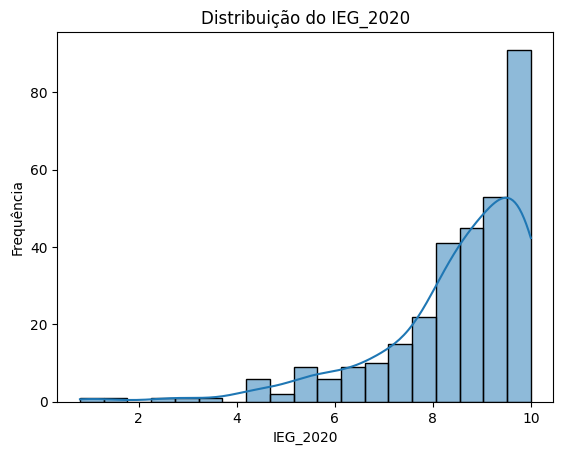

In [ ]:
import seaborn as sns

sns.histplot(df['IEG_2020'], kde=True)
plt.title('Distribuição do IEG_2020')
plt.xlabel('IEG_2020')
plt.ylabel('Frequência')
plt.show()


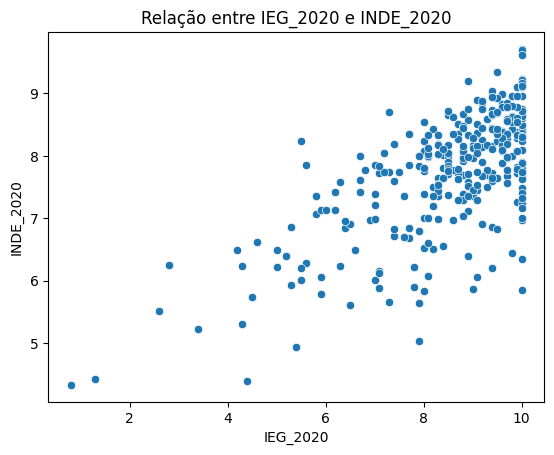

In [ ]:
sns.scatterplot(data=df, x='IEG_2020', y='INDE_2020')
plt.title('Relação entre IEG_2020 e INDE_2020')
plt.xlabel('IEG_2020')
plt.ylabel('INDE_2020')
plt.show()


In [ ]:
correlation = df[['IEG_2020', 'INDE_2020']].corr()
print(correlation)


           IEG_2020  INDE_2020
IEG_2020   1.000000   0.673435
INDE_2020  0.673435   1.000000


In [ ]:
import statsmodels.api as sm

X = df[['IEG_2020']]  # Variável independente
Y = df['INDE_2020']  # Variável dependente
X = sm.add_constant(X)  # Adicionando constante

model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              INDE_2020   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     258.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           7.70e-43
Time:                        10:44:07   Log-Likelihood:                -336.55
No. Observations:                 314   AIC:                             677.1
Df Residuals:                     312   BIC:                             684.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2272      0.221     19.170      0.0

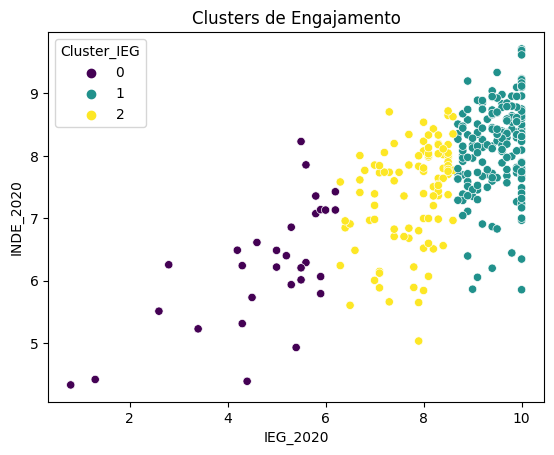

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['IEG_2020']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3)  # Escolha o número de clusters com base na análise
df['Cluster_IEG'] = kmeans.fit_predict(X_scaled)

# Visualizando os clusters de engajamento
sns.scatterplot(data=df, x='IEG_2020', y='INDE_2020', hue='Cluster_IEG', palette='viridis')
plt.title('Clusters de Engajamento')
plt.xlabel('IEG_2020')
plt.ylabel('INDE_2020')
plt.show()


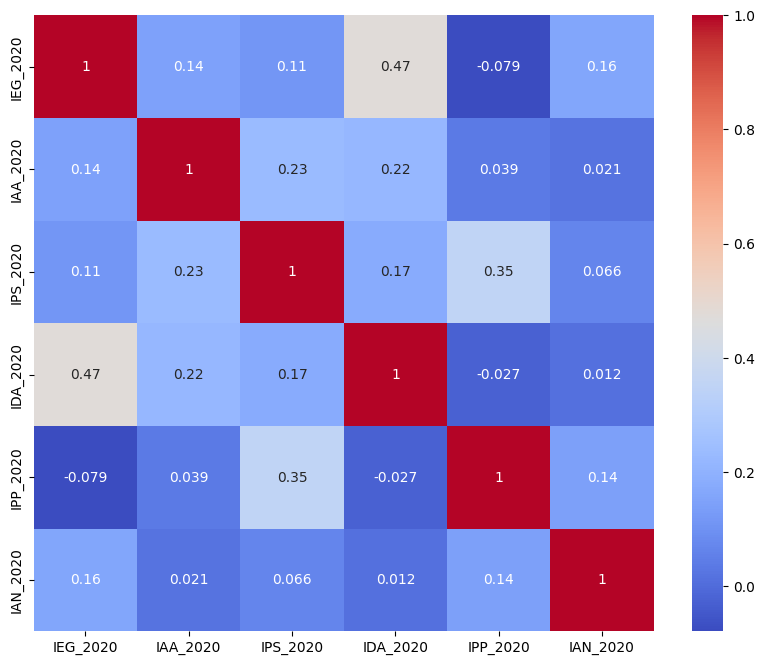

In [ ]:
# Selecionando as colunas de interesse
colunas_indicadores = ['IEG_2020', 'IAA_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IAN_2020']

# Calculando a matriz de correlação
correlation_matrix = df[colunas_indicadores].corr()

# Visualizando a matriz de correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


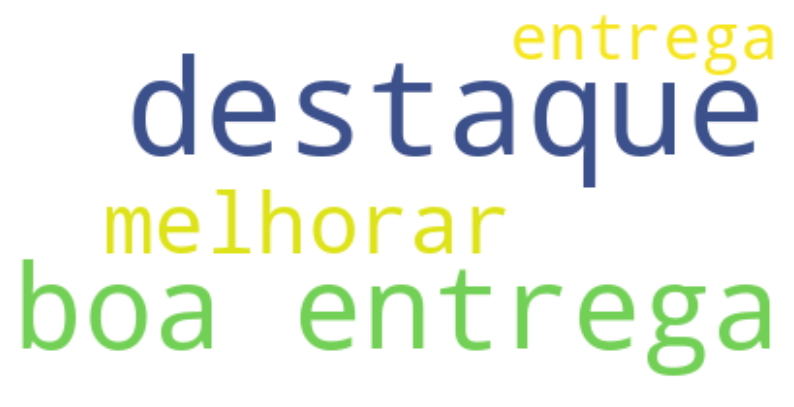

In [ ]:
from wordcloud import WordCloud

# Concatenando todos os textos da coluna DESTAQUE_IEG_2020
textos_concatenados = ' '.join(df['DESTAQUE_IEG_2020'].dropna())

# Definindo a lista de stop words
stop_words = set(['de', 'em', 'sua', 'seu', 'das', 'ponto', 'casa', 'lições', 'A'])  # Adicione mais palavras conforme necessário

# Criando o objeto WordCloud com as stop words
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(textos_concatenados)

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Não mostrar os eixos
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparando os dados para a análise de cluster
X_cluster = df[colunas_indicadores].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Aplicando K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
X_cluster['Cluster'] = clusters

# Analisando os perfis de cluster
perfil_cluster = X_cluster.groupby('Cluster').mean()
print(perfil_cluster)


TypeError: Could not convert 7.500028.333349.0000200000000019.5000200000000019.50002000000000110.0000200000000018.916689.166689.0000200000000018.3333410.0000200000000018.0000200000000019.0000200000000018.5000200000000019.0000200000000016.2499910.0000200000000019.00002000000000110.0000200000000018.333347.41667999999999958.0000200000000019.5000200000000019.583358.3333500000000018.5000200000000017.916679.583358.5000200000000019.0000200000000019.00002000000000110.00002000000000110.0000200000000017.500028.333349.0000200000000018.5000200000000018.5000200000000019.0000200000000019.583358.750019.0000200000000017.9166710.0000200000000015.833338.7500110.0000200000000019.5000200000000019.5000200000000019.5000200000000019.5000200000000018.750018.750019.50002000000000110.0000200000000018.750019.0000200000000019.583357.41667999999999957.41667999999999959.166688.0000200000000019.5000200000000019.00002000000000110.0000200000000017.916679.0000200000000017.500029.0000200000000019.0000200000000019.0000200000000018.5000200000000019.0000200000000019.0000200000000019.5000200000000017.916678.50002000000000110.0000200000000019.0000200000000019.0000200000000017.916677.916679.00002000000000110.0000200000000019.0000200000000019.166688.5000200000000018.00002000000000110.0000200000000017.083339.583359.0000200000000019.166689.00002000000000110.0000200000000019.0000200000000019.0000200000000017.916679.0000200000000018.5000200000000019.5000200000000019.0000200000000019.5000200000000019.0000200000000019.0000200000000019.0000200000000019.0000200000000019.166689.00002000000000110.0000200000000019.0000200000000018.0000200000000018.750019.166689.00002000000000110.0000200000000019.166689.5000200000000019.583359.5000200000000018.333349.5000200000000018.0000200000000019.5833500000000018.750018.5000200000000018.5000200000000018.333348.333346.249999.5000200000000019.1666810.0000200000000019.00002000000000110.0000200000000019.5000200000000017.91667 to numeric

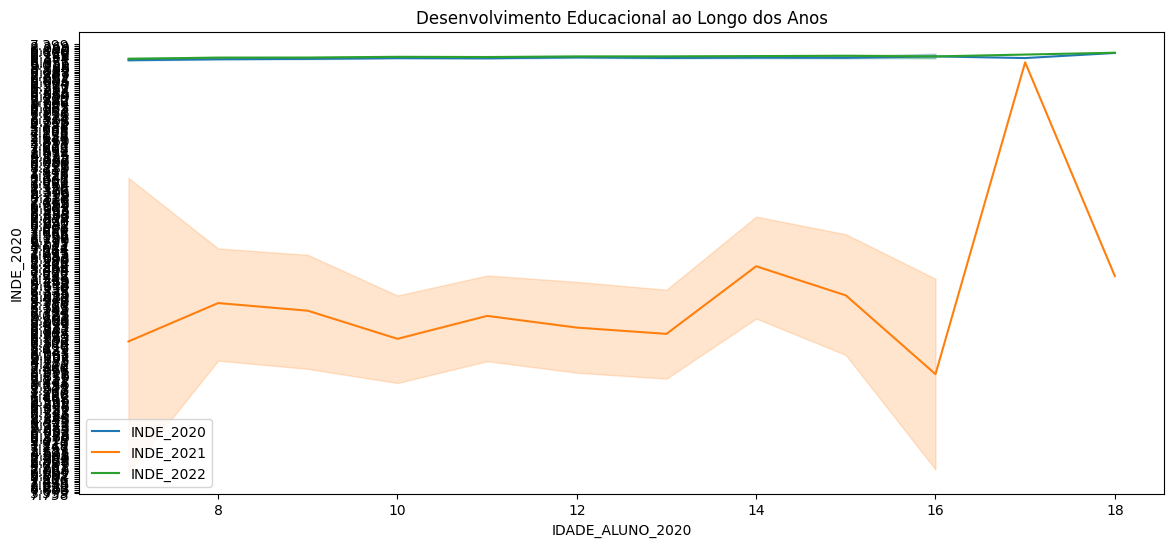

In [ ]:
# Plotando a tendência dos indicadores ao longo dos anos para verificar progresso
plt.figure(figsize=(14, 6))
for indicador in ['INDE_2020', 'INDE_2021', 'INDE_2022']:
    sns.lineplot(data=df, x='IDADE_ALUNO_2020', y=indicador, label=indicador)
plt.title('Desenvolvimento Educacional ao Longo dos Anos')
plt.legend()
plt.show()


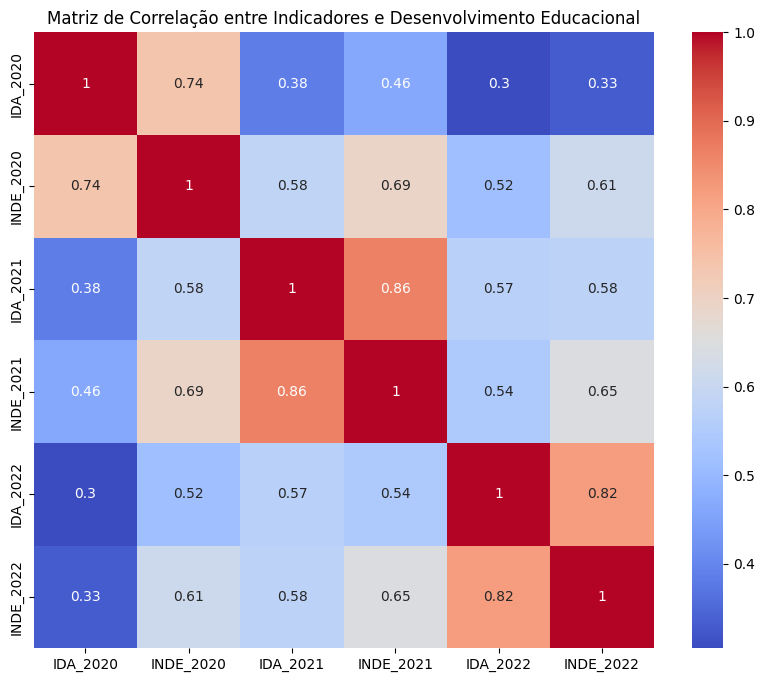

In [ ]:
# Calculando a matriz de correlação entre os indicadores para cada ano
correlation_matrix = df[['IDA_2020', 'INDE_2020', 'IDA_2021', 'INDE_2021', 'IDA_2022', 'INDE_2022']].corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlação entre Indicadores e Desenvolvimento Educacional')
plt.show()


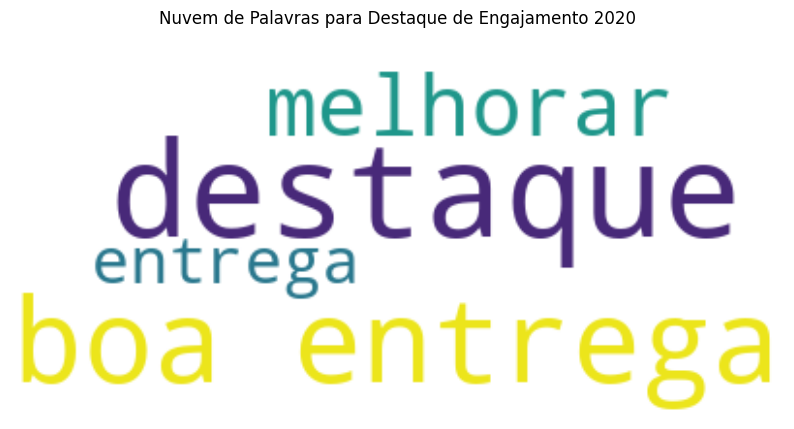

In [ ]:
# Nuvem de palavras para DESTAQUE_IEG_2020
textos_concatenados = ' '.join(df['DESTAQUE_IEG_2020'].dropna().astype(str))
stop_words = set(['de', 'em', 'sua', 'seu', 'das', 'ponto', 'casa', 'lições', 'A'])

wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(textos_concatenados)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras para Destaque de Engajamento 2020')
plt.show()


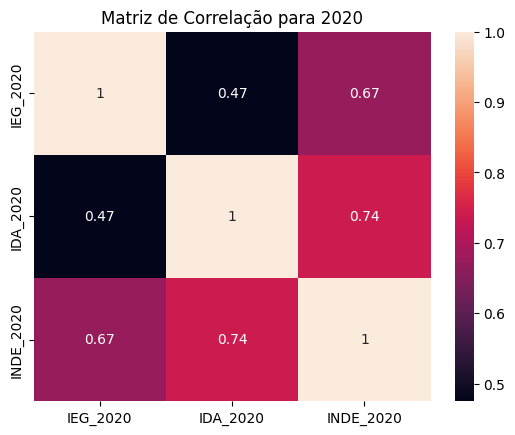

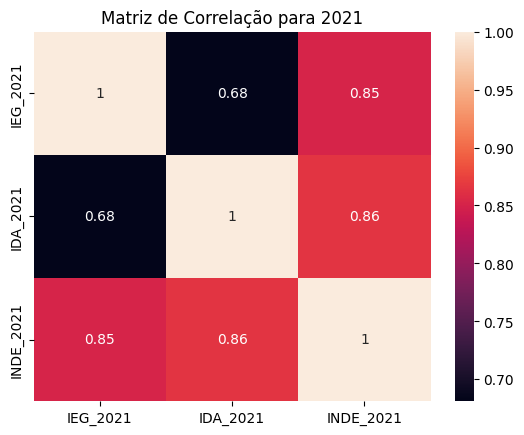

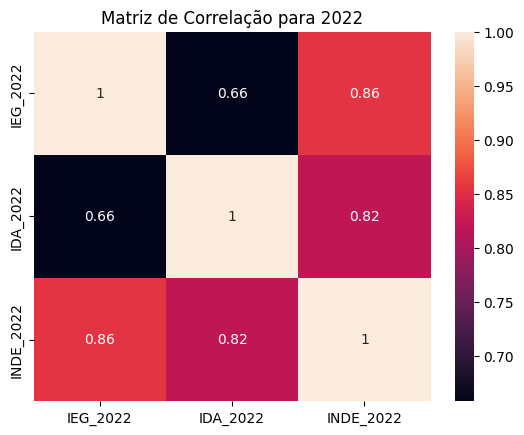

                            OLS Regression Results                            
Dep. Variable:              INDE_2020   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     329.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.54e-77
Time:                        10:45:21   Log-Likelihood:                -252.84
No. Observations:                 314   AIC:                             511.7
Df Residuals:                     311   BIC:                             522.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0162      0.170     23.655      0.0

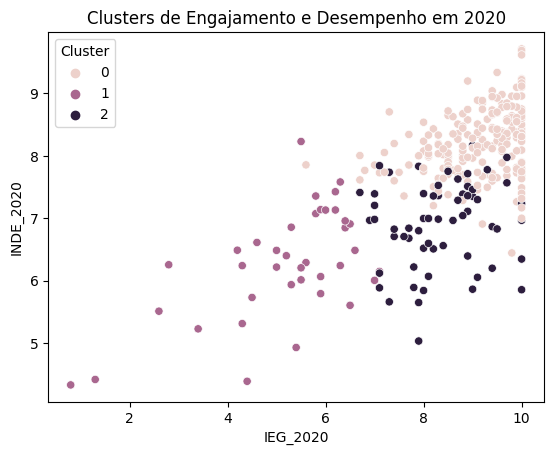

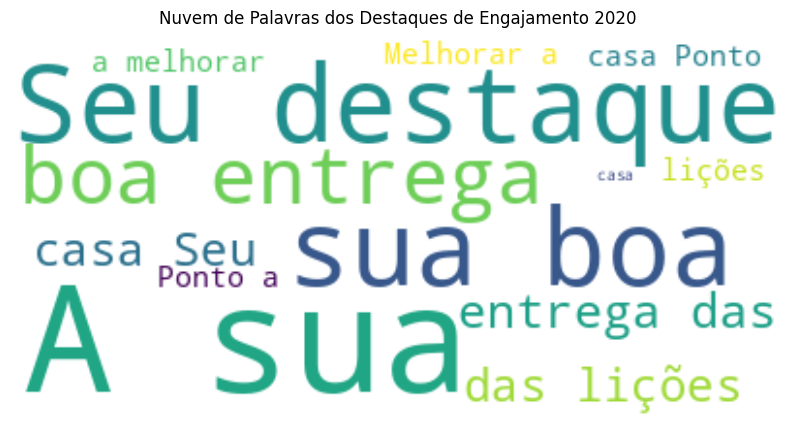

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import statsmodels.api as sm
from scipy.stats import pearsonr

# Suponha que seu DataFrame é df
# df = pd.read_csv('seu_arquivo.csv')

# Verifique se todos os valores são numéricos e trate os valores ausentes.
for coluna in ['IEG_2020', 'IEG_2021', 'IEG_2022', 'IDA_2020', 'IDA_2021', 'IDA_2022', 'INDE_2020', 'INDE_2021', 'INDE_2022']:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

df.dropna(subset=['IEG_2020', 'IEG_2021', 'IEG_2022', 'IDA_2020', 'IDA_2021', 'IDA_2022', 'INDE_2020', 'INDE_2021', 'INDE_2022'], inplace=True)

# Análise de Correlação ao longo dos anos
for ano in ['2020', '2021', '2022']:
    sns.heatmap(df[[f'IEG_{ano}', f'IDA_{ano}', f'INDE_{ano}']].corr(), annot=True)
    plt.title(f'Matriz de Correlação para {ano}')
    plt.show()

# Análise de Regressão
# Criando um DataFrame para a regressão com dados dos três anos
df_regressao = df[['IEG_2020', 'IDA_2020', 'INDE_2020']].dropna()
X = df_regressao[['IEG_2020', 'IDA_2020']]
Y = df_regressao['INDE_2020']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

# Análise de Cluster para um ano
X_cluster = df[['IEG_2020', 'IDA_2020', 'INDE_2020']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x='IEG_2020', y='INDE_2020', hue='Cluster', data=df)
plt.title('Clusters de Engajamento e Desempenho em 2020')
plt.show()

# Análise de Texto com WordCloud
textos_concatenados = ' '.join(df['DESTAQUE_IEG_2020'].dropna().astype(str))
wordcloud = WordCloud(stopwords=['de', 'e', 'o', 'em', 'que', 'do'], background_color='white').generate(textos_concatenados)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras dos Destaques de Engajamento 2020')
plt.show()


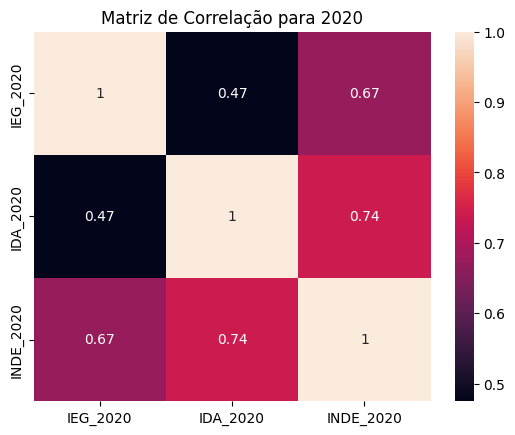

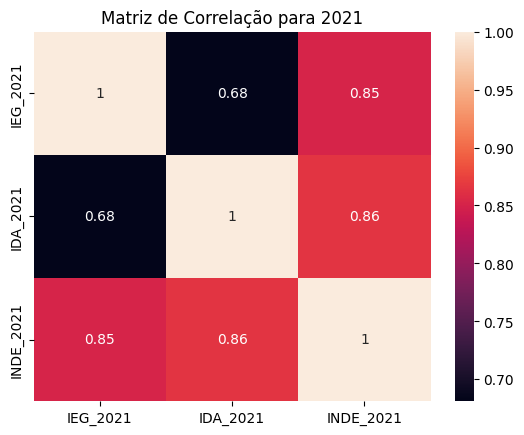

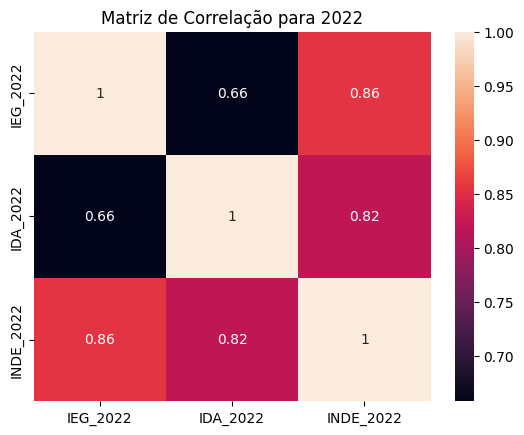

Regressão para o ano 2020
                            OLS Regression Results                            
Dep. Variable:              INDE_2020   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     329.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.54e-77
Time:                        10:45:29   Log-Likelihood:                -252.84
No. Observations:                 314   AIC:                             511.7
Df Residuals:                     311   BIC:                             522.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0162     

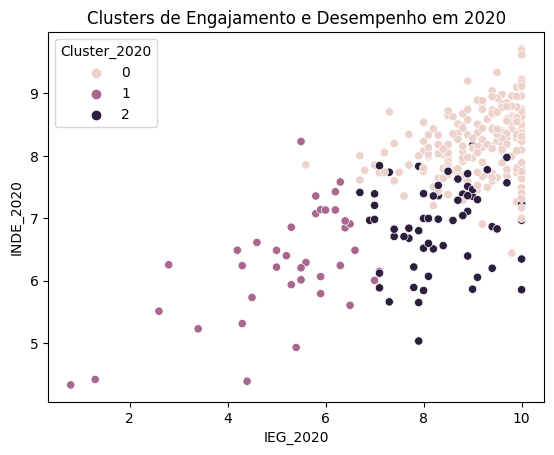

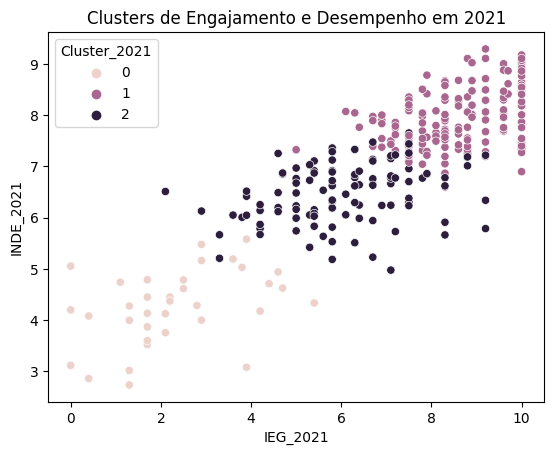

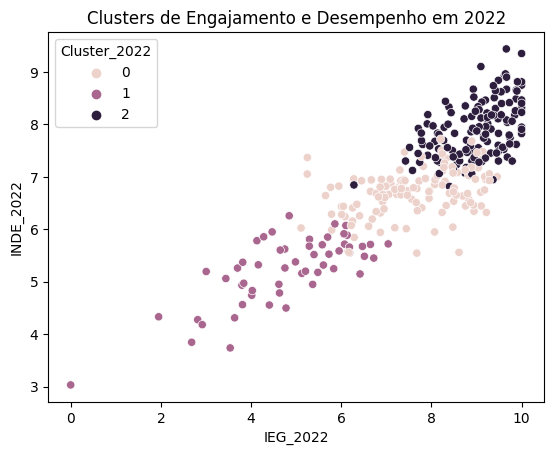

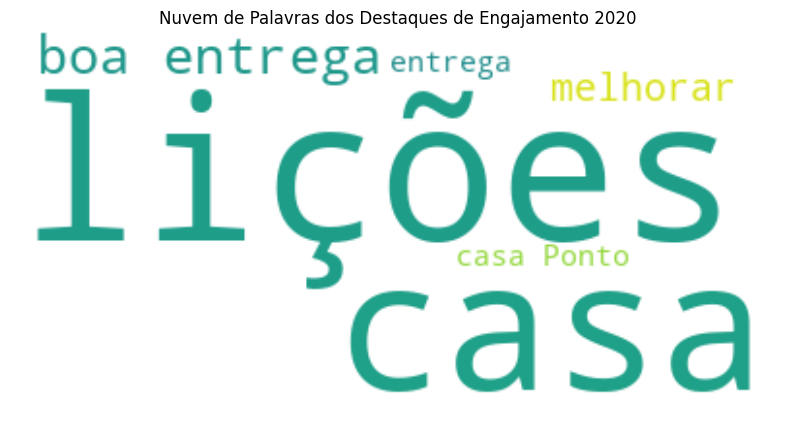

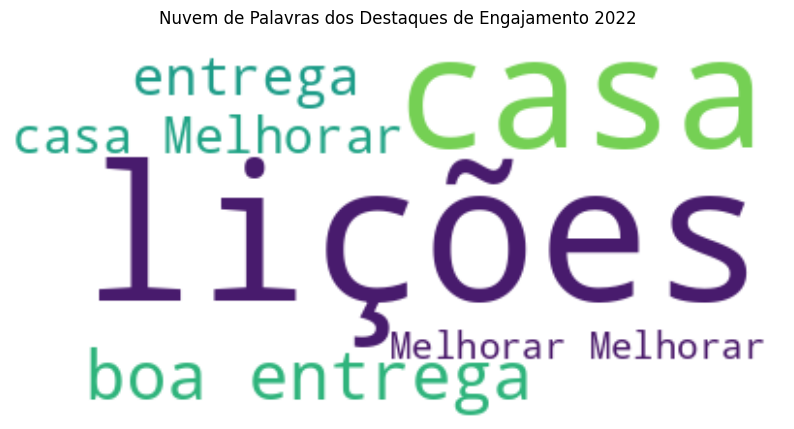

In [ ]:
# Bibliotecas necessárias já foram importadas nas células anteriores.

# Análise de Correlação Longitudinal
anos = ['2020', '2021', '2022']
for ano in anos:
    sns.heatmap(df[[f'IEG_{ano}', f'IDA_{ano}', f'INDE_{ano}']].corr(), annot=True)
    plt.title(f'Matriz de Correlação para {ano}')
    plt.show()

# Análise de Regressão Longitudinal
for ano in anos:
    X = df[[f'IEG_{ano}', f'IDA_{ano}']]
    Y = df[f'INDE_{ano}']
    X = sm.add_constant(X)

    modelo = sm.OLS(Y, X).fit()
    print(f'Regressão para o ano {ano}')
    print(modelo.summary())
    print('\n\n')

# Análise de Cluster Longitudinal
for ano in anos:
    X_cluster = df[[f'IEG_{ano}', f'IDA_{ano}', f'INDE_{ano}']].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)

    kmeans = KMeans(n_clusters=3, random_state=42)
    df[f'Cluster_{ano}'] = kmeans.fit_predict(X_scaled)

    sns.scatterplot(x=f'IEG_{ano}', y=f'INDE_{ano}', hue=f'Cluster_{ano}', data=df)
    plt.title(f'Clusters de Engajamento e Desempenho em {ano}')
    plt.show()

# Análise Qualitativa de Comentários
for ano in anos:
    if f'DESTAQUE_IEG_{ano}' in df.columns:
      textos_concatenados = ' '.join(df[f'DESTAQUE_IEG_{ano}'].dropna().astype(str))
      wordcloud = WordCloud(stopwords=['de', 'e', 'o', 'a', 'em', 'que', 'do', 'sua', 'seu', 'destaque', 'das', 'nas'], background_color='white').generate(textos_concatenados)
      plt.figure(figsize=(10, 7))
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.axis('off')
      plt.title(f'Nuvem de Palavras dos Destaques de Engajamento {ano}')
      plt.show()


In [ ]:
# Análise de Correlação Longitudinal
for ano in ['2020', '2021', '2022']:
    # Certifique-se de que as colunas corretas estão sendo usadas para cada ano
    colunas_relevantes = [col for col in df.columns if col.endswith(ano)]
    sns.heatmap(df[colunas_relevantes].corr(), annot=True, cmap="coolwarm")
    plt.title(f"Matriz de Correlação para {ano}")
    plt.show()

# Análise de Regressão Longitudinal para IEG e IDA relacionados a INDE
for ano in ['2020', '2021', '2022']:
    # Garanta que as colunas IEG, IDA e INDE existem para o ano atual
    if f'IEG_{ano}' in df.columns and f'IDA_{ano}' in df.columns and f'INDE_{ano}' in df.columns:
        X = df[[f'IEG_{ano}', f'IDA_{ano}']]
        Y = df[f'INDE_{ano}']
        X = sm.add_constant(X)  # Adiciona uma constante ao modelo

        modelo = sm.OLS(Y, X).fit()
        print(f"Regressão para o ano {ano}")
        print(df.columns)
        print(modelo.summary())
        print("\n")

# Análise de Cluster para um ano específico
# Use esta análise para o ano que você tem certeza que tem os dados corretos
X_cluster = df[['IEG_2020', 'IDA_2020', 'INDE_2020']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters  # Nomeie o cluster de acordo com o ano se necessário

# Análise Qualitativa de Comentários
for ano in ['2020', '2022']:  # Exclua 2021 já que 'DESTAQUE_IEG_2021' não existe
    if f'DESTAQUE_IEG_{ano}' in df.columns:
        textos_concatenados = ' '.join(df[f'DESTAQUE_IEG_{ano}'].dropna().astype(str))
        wordcloud = WordCloud(stopwords=['de', 'e', 'o', 'em', 'que', 'do', 'sua', 'seu', 'destaque', 'a' ], background_color='white').generate(textos_concatenados)
        plt.figure(figsize=(10, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Nuvem de Palavras dos Destaques de Engajamento {ano}")
        plt.show()

ValueError: could not convert string to float: 'B'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


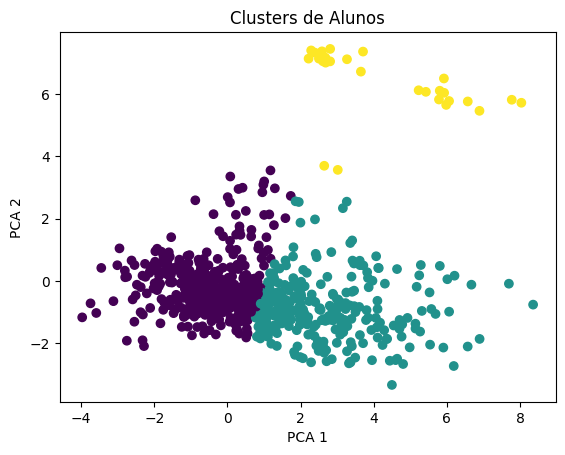

                            OLS Regression Results                            
Dep. Variable:              INDE_2020   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     163.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.42e-208
Time:                        11:44:18   Log-Likelihood:                -1238.8
No. Observations:                1346   AIC:                             2498.
Df Residuals:                    1336   BIC:                             2550.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.5732      0.263  

In [ ]:
import statsmodels.formula.api as smf

# We need to reset the index to use 'NOME' as a column again
df_reset = df.reset_index()

# Now, we apply the pd.wide_to_long function with 'NOME' as the i parameter
df_long = pd.wide_to_long(df_reset,
                          stubnames=['IEG', 'IDA', 'IPS', 'IPP', 'IPV', 'IAN', 'INDE'],
                          i='NOME',
                          j='Ano',
                          sep='_',
                          suffix=r'\d+').reset_index()

# Conduct the mixed-effects model analysis
md = smf.mixedlm("INDE ~ IEG + IDA + IPS + IPP + IPV + IAN + Ano", df_long, groups=df_long["NOME"])
mdf = md.fit()
print(mdf.summary())


           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  INDE      
No. Observations:  4038     Method:              REML      
No. Groups:        1346     Scale:               0.2129    
Min. group size:   3        Log-Likelihood:      -2801.0166
Max. group size:   3        Converged:           Yes       
Mean group size:   3.0                                     
-----------------------------------------------------------
           Coef.   Std.Err.    z    P>|z|  [0.025   0.975] 
-----------------------------------------------------------
Intercept -170.061   22.969  -7.404 0.000 -215.080 -125.042
IEG          0.145    0.006  24.108 0.000    0.133    0.157
IDA          0.118    0.005  24.617 0.000    0.109    0.128
IPS          0.093    0.008  11.448 0.000    0.077    0.108
IPP         -0.093    0.009 -10.900 0.000   -0.110   -0.076
IPV          0.306    0.010  30.648 0.000    0.286    0.325
IAN          0.051    0.004  12.466 0.000    0.043 

# VAI USAR

In [ ]:
COLOR_PALETTE = {
    "blue": "#012b66",
    "yellow": "#f6a522",
    "orange": "#ff5216",
    "green": "#1ac7ae",
    "light_blue": "#017dca",
    "red": "#ff0000",
    "dark": "#333333",
}

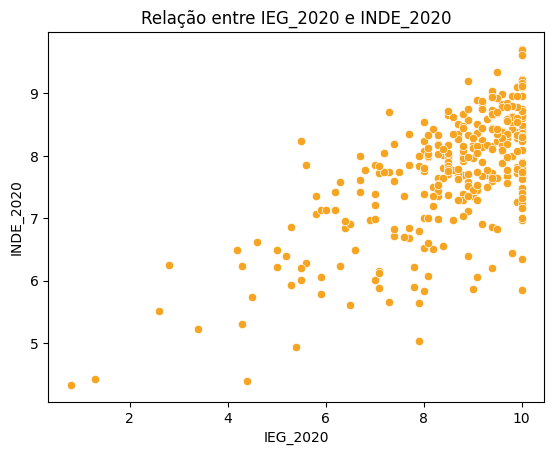

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='IEG_2020', y='INDE_2020', color=COLOR_PALETTE['yellow'])
sns.set_palette(COLOR_PALETTE.values())
plt.title('Relação entre IEG_2020 e INDE_2020')
plt.xlabel('IEG_2020')
plt.ylabel('INDE_2020')
plt.show()

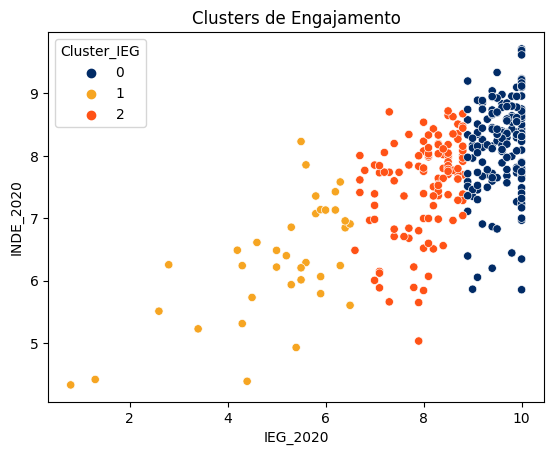

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

COLOR_PALETTE = {
    "blue": "#012b66",
    "yellow": "#f6a522",
    "orange": "#ff5216",
    "green": "#1ac7ae",
    "light_blue": "#017dca",
    "red": "#ff0000",
    "dark": "#333333",
}

X = df[['IEG_2020']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3)  # Escolha o número de clusters com base na análise
df['Cluster_IEG'] = kmeans.fit_predict(X_scaled)


# Define custom color palette
custom_palette = COLOR_PALETTE.values()  # Example custom palette

# Set the color palette
sns.set_palette(custom_palette)

# Visualizando os clusters de engajamento
sns.scatterplot(data=df, x='IEG_2020', y='INDE_2020', hue='Cluster_IEG', palette=["#012b66", "#f6a522", "#ff5216"])
plt.title('Clusters de Engajamento')
plt.xlabel('IEG_2020')
plt.ylabel('INDE_2020')
plt.show()


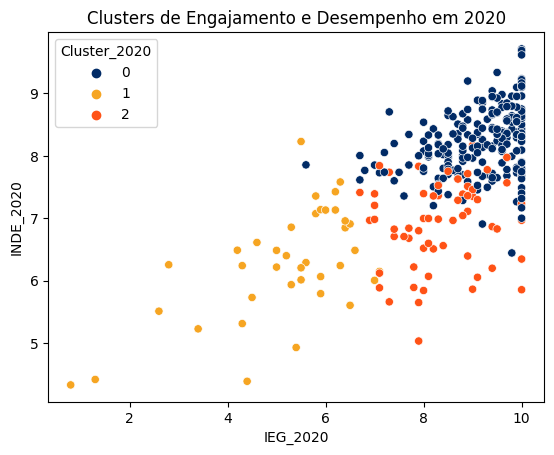

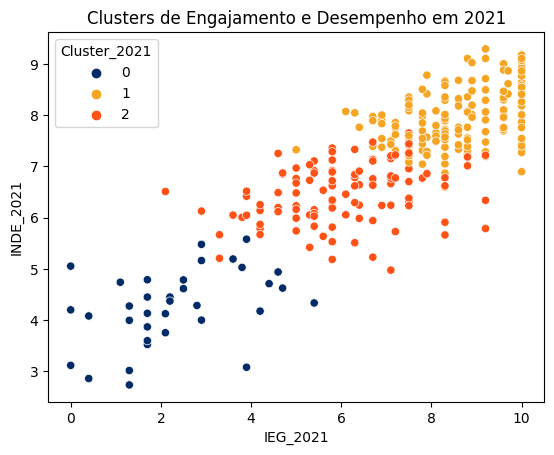

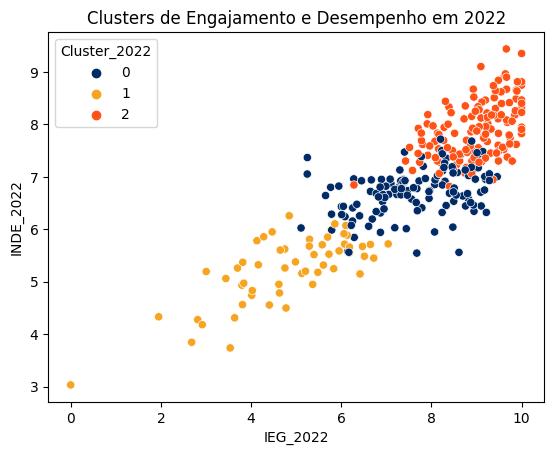

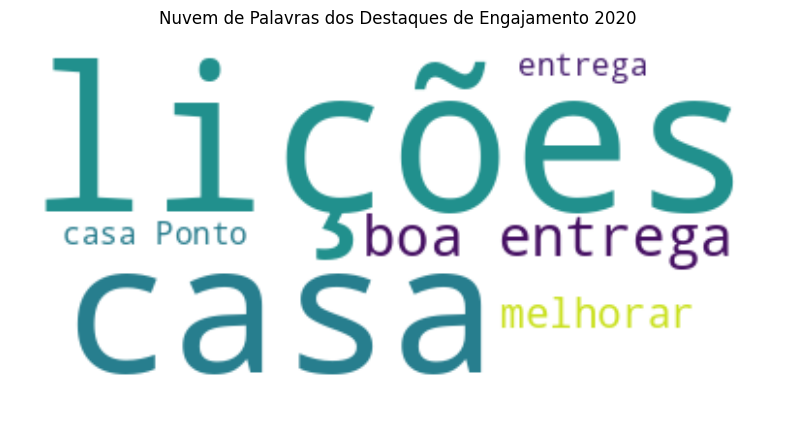

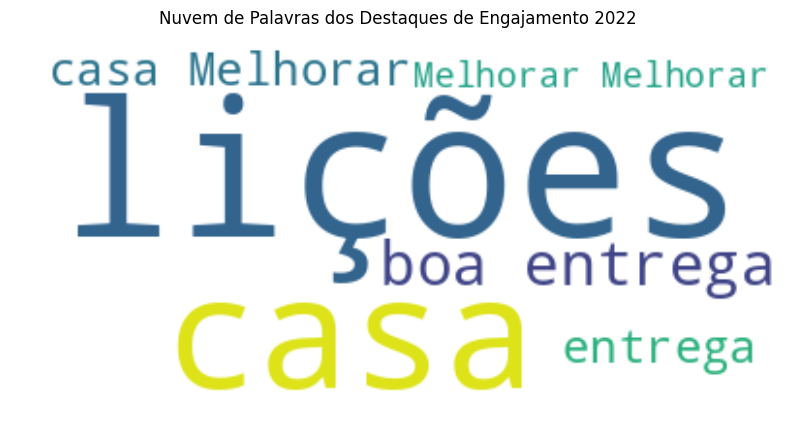

In [ ]:
anos = ['2020', '2021', '2022']

# Análise de Cluster Longitudinal
for ano in anos:
    X_cluster = df[[f'IEG_{ano}', f'IDA_{ano}', f'INDE_{ano}']].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)

    kmeans = KMeans(n_clusters=3, random_state=42)
    df[f'Cluster_{ano}'] = kmeans.fit_predict(X_scaled)

    sns.scatterplot(x=f'IEG_{ano}', y=f'INDE_{ano}', hue=f'Cluster_{ano}', data=df, palette=["#012b66", "#f6a522", "#ff5216"])
    plt.title(f'Clusters de Engajamento e Desempenho em {ano}')
    plt.show()

# Análise Qualitativa de Comentários
for ano in anos:
    if f'DESTAQUE_IEG_{ano}' in df.columns:
      textos_concatenados = ' '.join(df[f'DESTAQUE_IEG_{ano}'].dropna().astype(str))
      wordcloud = WordCloud(stopwords=['de', 'e', 'o', 'a', 'em', 'que', 'do', 'sua', 'seu', 'destaque', 'das', 'nas'], background_color='white').generate(textos_concatenados)
      plt.figure(figsize=(10, 7))
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.axis('off')
      plt.title(f'Nuvem de Palavras dos Destaques de Engajamento {ano}')
      plt.show()


In [ ]:
df.to_csv('dataset.csv', index=False, sep=';')

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preparando os dados para a análise de clusters
variaveis_de_interesse = ['IDADE_ALUNO_2020', 'ANOS_PM_2020', 'IEG_2020', 'IDA_2020', 'INDE_2020', 'IPS_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']
dados_para_cluster = df[variaveis_de_interesse].dropna()

# Normalizando os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_para_cluster)

# Redução de dimensionalidade (opcional, para visualização)
pca = PCA(n_components=2)
dados_reduzidos = pca.fit_transform(dados_normalizados)

# Aplicação do K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(dados_reduzidos)

# Adicionando os clusters ao DataFrame original
df['Cluster'] = clusters

# Visualização dos clusters (se houver redução de dimensionalidade)
plt.scatter(dados_reduzidos[:, 0], dados_reduzidos[:, 1], c=df['Cluster'])
plt.title("Clusters de Alunos")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Assumindo que 'df' é o seu DataFrame e que 'INDE_2020' é a variável que você quer prever
variaveis_independentes = ['IDADE_ALUNO_2020', 'ANOS_PM_2020', 'IEG_2020', 'IDA_2020', 'IPS_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'Cluster']

X = df[variaveis_independentes]  # Certifique-se de que INDE_2020 não está incluído aqui
Y = df['INDE_2020']

# Adicionando uma constante ao modelo
X = sm.add_constant(X)

# Criando o modelo de regressão
modelo = sm.OLS(Y, X).fit()

# Imprimindo o sumário do modelo
print(modelo.summary())


NameError: name 'plt' is not defined